In [1]:
import math
import torch
import matplotlib.pyplot as plt
from nplGP import *
from torch.distributions.uniform import Uniform
from torch.distributions.normal import Normal

In [2]:
def f(x):
    return torch.sin(x)

In [3]:
num_obs = 6
X_prior_dist = Uniform(torch.tensor([0.0]), torch.tensor([10.0]))
Y_prior_dist = Normal(torch.tensor([0.0]), torch.tensor([1.0]))
X = X_prior_dist.sample(sample_shape = torch.Size([num_obs]))
y = f(X)

In [4]:
xtest = torch.linspace(0, 10, 1000).unsqueeze(1)
xtest_numpy = xtest.detach().numpy()

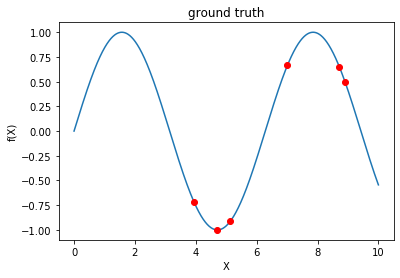

In [5]:
plt.plot(xtest_numpy, f(xtest).detach().numpy())
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(X, y, 'ro')
plt.title('ground truth')
plt.show()

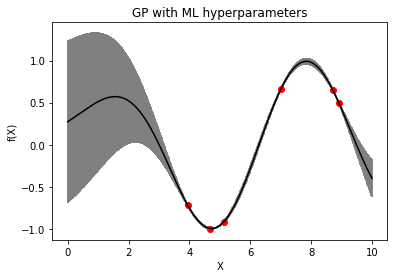

In [6]:
mle = train_GP_MLE(X, y, xtest=xtest, return_mean=True, num_samples=0, num_iters=10000, verbose=False)
plt.errorbar(xtest, mle['mean'], yerr=mle['std'], color='black', ecolor='gray')

plt.plot(X, y, 'ro')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('GP with ML hyperparameters')
plt.show()

/home/sinead/NPL/GP/nplGP.py:68: RuntimeWarning: covariance is not positive-semidefinite.
  samp = np.random.multivariate_normal(mean.squeeze(), cov, size=num_samples)


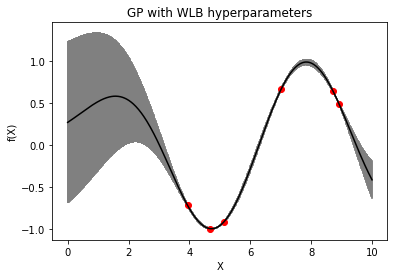

In [7]:
wlb = train_GP_WLB(X, y, xtest=xtest, return_mean=True, return_samples=False, num_bootstraps=50, 
                   samples_per_bootstrap=100, num_iters=10000, verbose=False)
plt.errorbar(xtest, wlb['mean'], yerr=wlb['std'], color='black', ecolor='gray')

plt.plot(X, y, 'ro')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('GP with WLB hyperparameters')
plt.show()


/home/sinead/NPL/GP/nplGP.py:68: RuntimeWarning: covariance is not positive-semidefinite.
  samp = np.random.multivariate_normal(mean.squeeze(), cov, size=num_samples)


Text(0.5, 1.0, 'GP with NPL, alpha=1')

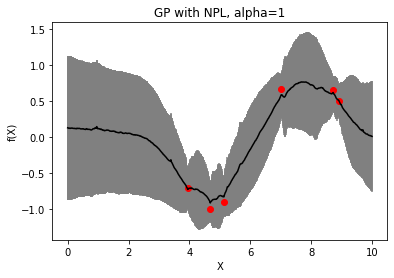

In [9]:
npl = train_GP_NPL(X, y, x_prior_dist=X_prior_dist, y_prior_dist=Y_prior_dist, 
                   xtest=xtest, return_mean=True, return_samples=False, num_bootstraps=50, 
                   samples_per_bootstrap=100, num_iters=10000, alpha=1., num_pseudo=10, verbose=False)
plt.errorbar(xtest, npl['mean'], yerr=npl['std'], color='black', ecolor='gray')

plt.plot(X, y, 'ro')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('GP with NPL, alpha=1')


/home/sinead/NPL/GP/nplGP.py:68: RuntimeWarning: covariance is not positive-semidefinite.
  samp = np.random.multivariate_normal(mean.squeeze(), cov, size=num_samples)


Text(0.5, 1.0, 'GP with NPL, alpha=0.1')

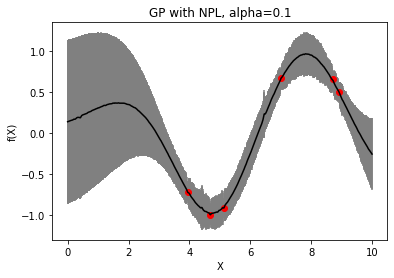

In [10]:
npl = train_GP_NPL(X, y, x_prior_dist=X_prior_dist, y_prior_dist=Y_prior_dist, 
                   xtest=xtest, return_mean=True, return_samples=False, num_bootstraps=50, 
                   samples_per_bootstrap=100, num_iters=10000, alpha=.1, num_pseudo=10, verbose=False)
plt.errorbar(xtest, npl['mean'], yerr=npl['std'], color='black', ecolor='gray')

plt.plot(X, y, 'ro')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('GP with NPL, alpha=0.1')
